In [1]:
import scanpy as sc
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.colors as mcolors


sc.logging.print_header()

adata = sc.read_h5ad('nbl(UQlabel).h5ad')###after re-annotation

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-pac

scanpy==1.9.3 anndata==0.9.1 umap==0.5.3 numpy==1.24.3 scipy==1.10.1 pandas==2.0.1 scikit-learn==1.2.2 statsmodels==0.14.0 python-igraph==0.10.4 pynndescent==0.5.10


In [2]:
adata

AnnData object with n_obs × n_vars = 165813 × 26829
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'scrublet_score', 'scrublet_classification', 'CMO301', 'CMO302', 'CMO303', 'CMO304', 'CMO305', 'CMO306', 'CMO307', 'CMO308', 'CMO309', 'CMO310', 'CMO311', 'CMO312', 'Assignment_Probability', 'Assignment', 'new.ident', 'percent.mito', 'percent.ribo', 'log10GenesPerUMI', 'Sample_ID', 'new_ident', 'Sample_SubID', 'Patient', 'MYCNamp', 'Treatment_Stage', 'Sex', 'INSS_Stage', 'INRG_Risk', 'Age_at_diagnosis__months_', 'Anatomical_Site', 'Sample_Type', 'Sequencing_Batch', 'Chromium_Batch', 'Version_Chemistry', 'Fresh_or_Cryopr_', 'Time_from_diagnosis__days_', 'FACS', 'Sequencing_Depth', 'CRv3_Estimated_Cells', 'CRv3_Fraction_of_reads_in_cells____', 'CRv3_Mean_reads_per_cell', 'CRv3_Median_genes_per_cell', 'CRv3_Total_genes_detected', 'CRv3_Warnings_or_Errors', 'Putative_neuroblasts', 'Differentially_expressed_markers', 'Sample_Description', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'n

In [3]:
# Compute UMAP
sc.tl.umap(adata)

# The UMAP coordinates will be stored in adata.obsm['X_umap']

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


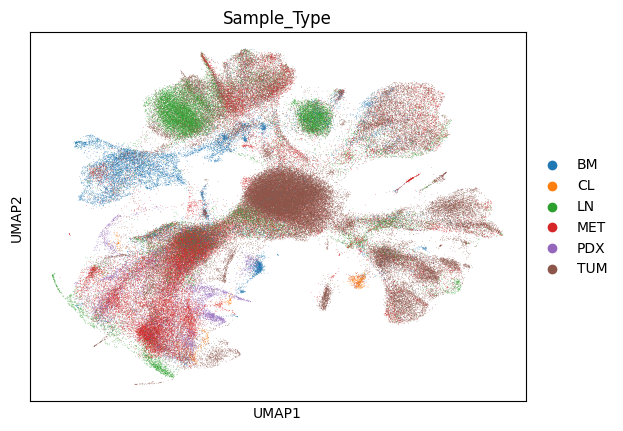

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


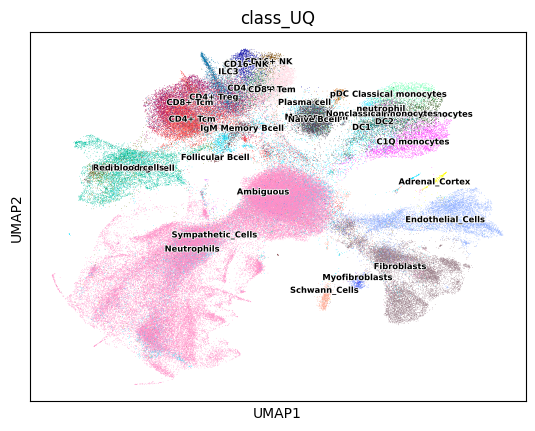

In [4]:
# Now you can plot using the umap() function:
sc.pl.umap(adata, color=['Sample_Type'])
sc.pl.umap(adata, color=['class_UQ'], legend_fontsize="6", legend_fontoutline=1, legend_loc='on data')


/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


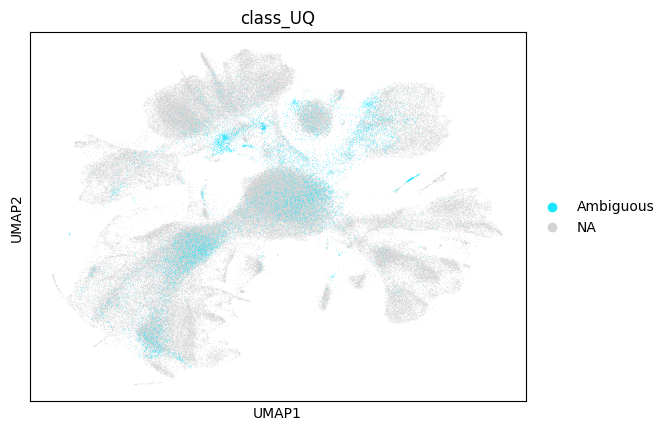

In [5]:
sc.pl.umap(adata, color=['class_UQ'], groups = "Ambiguous")

In [6]:
adata.obs.class_UQ.cat.categories

Index(['Adrenal_Cortex', 'Ambiguous', 'C1Q monocytes', 'CD4+ Tcm', 'CD4+ Tem',
       'CD4+ Treg', 'CD8+ Tcm', 'CD8+ Tem', 'CD16+ NK', 'CD16- NK',
       'Classical monocytes', 'DC1', 'DC2', 'Endothelial_Cells', 'Fibroblasts',
       'Follicular Bcell', 'ILC3', 'IgM Memory Bcell',
       'Intermediate monocytes', 'Memory Bcell', 'Myofibroblasts',
       'Naive Bcell', 'Neutrophils', 'Nonclassical monocytes', 'Plasma cell',
       'Proliferating Tcell', 'Red blood cells', 'Schwann_Cells',
       'Sympathetic_Cells', 'neutrophil', 'pDC'],
      dtype='object')

# subsetting unknown fibroblast cells for further annotation

In [7]:
##edata for all kinds of fibroblast cells
fdata=adata[(adata.obs['class_UQ'].isin(['Fibroblasts','Myofibroblasts']))].copy()
fdata

AnnData object with n_obs × n_vars = 12314 × 26829
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'scrublet_score', 'scrublet_classification', 'CMO301', 'CMO302', 'CMO303', 'CMO304', 'CMO305', 'CMO306', 'CMO307', 'CMO308', 'CMO309', 'CMO310', 'CMO311', 'CMO312', 'Assignment_Probability', 'Assignment', 'new.ident', 'percent.mito', 'percent.ribo', 'log10GenesPerUMI', 'Sample_ID', 'new_ident', 'Sample_SubID', 'Patient', 'MYCNamp', 'Treatment_Stage', 'Sex', 'INSS_Stage', 'INRG_Risk', 'Age_at_diagnosis__months_', 'Anatomical_Site', 'Sample_Type', 'Sequencing_Batch', 'Chromium_Batch', 'Version_Chemistry', 'Fresh_or_Cryopr_', 'Time_from_diagnosis__days_', 'FACS', 'Sequencing_Depth', 'CRv3_Estimated_Cells', 'CRv3_Fraction_of_reads_in_cells____', 'CRv3_Mean_reads_per_cell', 'CRv3_Median_genes_per_cell', 'CRv3_Total_genes_detected', 'CRv3_Warnings_or_Errors', 'Putative_neuroblasts', 'Differentially_expressed_markers', 'Sample_Description', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nF

In [10]:
np.max(fdata.X)

8.102597

In [11]:
np.min(fdata.X)

0.0

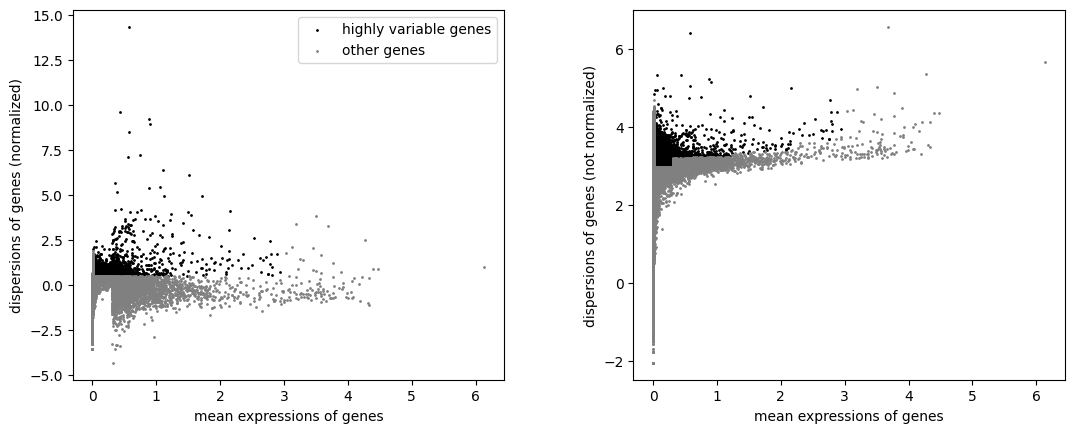

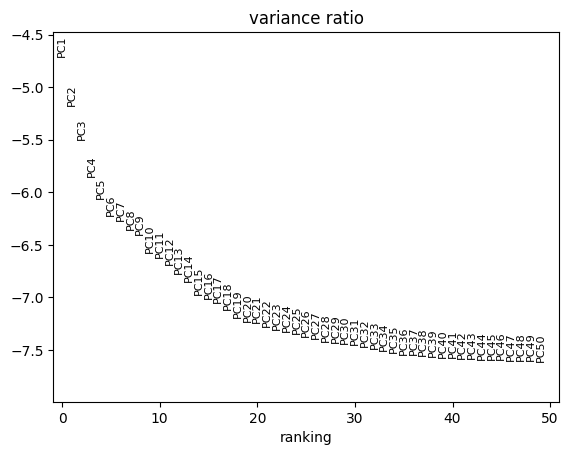

2023-08-08 14:31:38,602 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-08-08 14:31:45,000 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-08-08 14:31:45,051 - harmonypy - INFO - Iteration 1 of 10
2023-08-08 14:31:47,631 - harmonypy - INFO - Iteration 2 of 10
2023-08-08 14:31:50,505 - harmonypy - INFO - Iteration 3 of 10
2023-08-08 14:31:53,670 - harmonypy - INFO - Iteration 4 of 10
2023-08-08 14:31:56,173 - harmonypy - INFO - Iteration 5 of 10
2023-08-08 14:31:58,013 - harmonypy - INFO - Iteration 6 of 10
2023-08-08 14:32:01,090 - harmonypy - INFO - Iteration 7 of 10
2023-08-08 14:32:03,675 - harmonypy - INFO - Converged after 7 iterations


In [12]:
try:
    fdata.uns.pop("log1p")
except:
    pass
sc.pp.highly_variable_genes(fdata, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(fdata)
fdata.raw = fdata
fdata = fdata[:, fdata.var.highly_variable]
sc.pp.regress_out(fdata, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(fdata, max_value=10)
sc.tl.pca(fdata, svd_solver='arpack')
sc.pl.pca_variance_ratio(fdata, log=True, n_pcs = 50)
sc.external.pp.harmony_integrate(fdata, key="Sample_ID")
sc.pp.neighbors(fdata,use_rep = 'X_pca_harmony',n_neighbors = 10, n_pcs=40)
sc.tl.umap(fdata, min_dist = 0.3)

In [13]:
np.max(fdata.X)

10.0

In [14]:
np.min(fdata.X)

-5.5476055

In [15]:
fdata.write('fibroblasts_reannot_subset01.h5ad', compression = 'gzip')

In [4]:
#fdata = sc.read_h5ad('fibroblasts_subset01.h5ad')

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


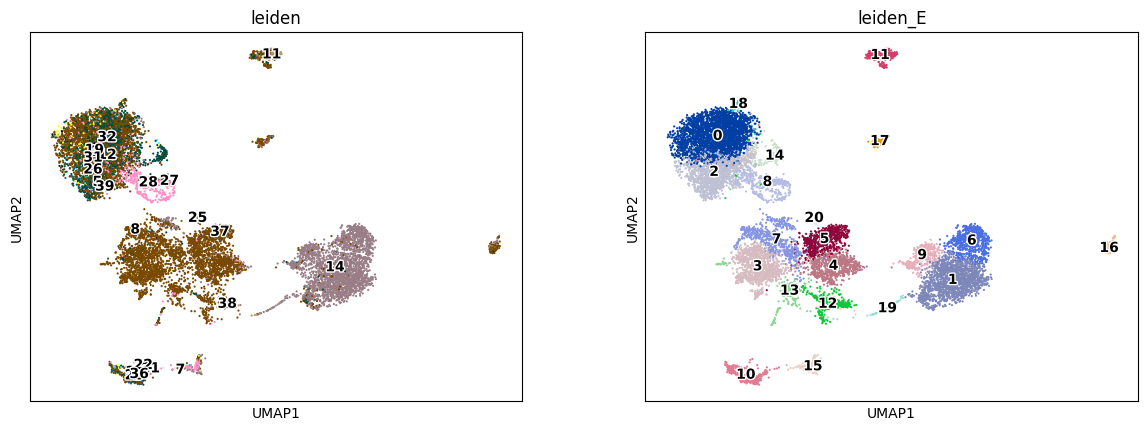

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


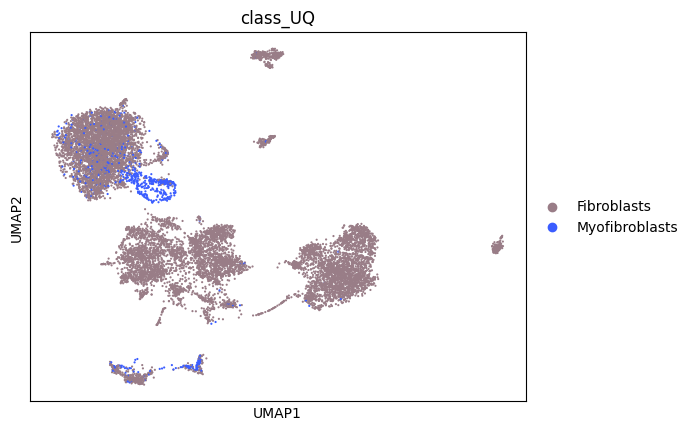

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


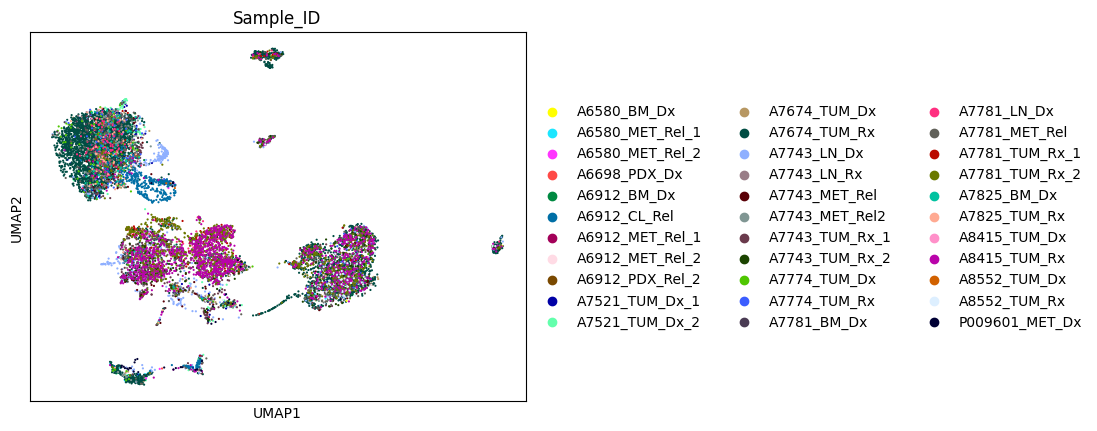

In [16]:
sc.tl.leiden(fdata, key_added = "leiden_E")
sc.pl.umap(fdata, color=['leiden', "leiden_E"], legend_fontoutline=2, legend_loc='on data')
sc.pl.umap(fdata, color=['class_UQ'])
sc.pl.umap(fdata, color=['Sample_ID'])

In [17]:
sc.tl.rank_genes_groups(fdata,groupby='leiden_E', method='wilcoxon')

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/tools/_rank_genes_groups.py:

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


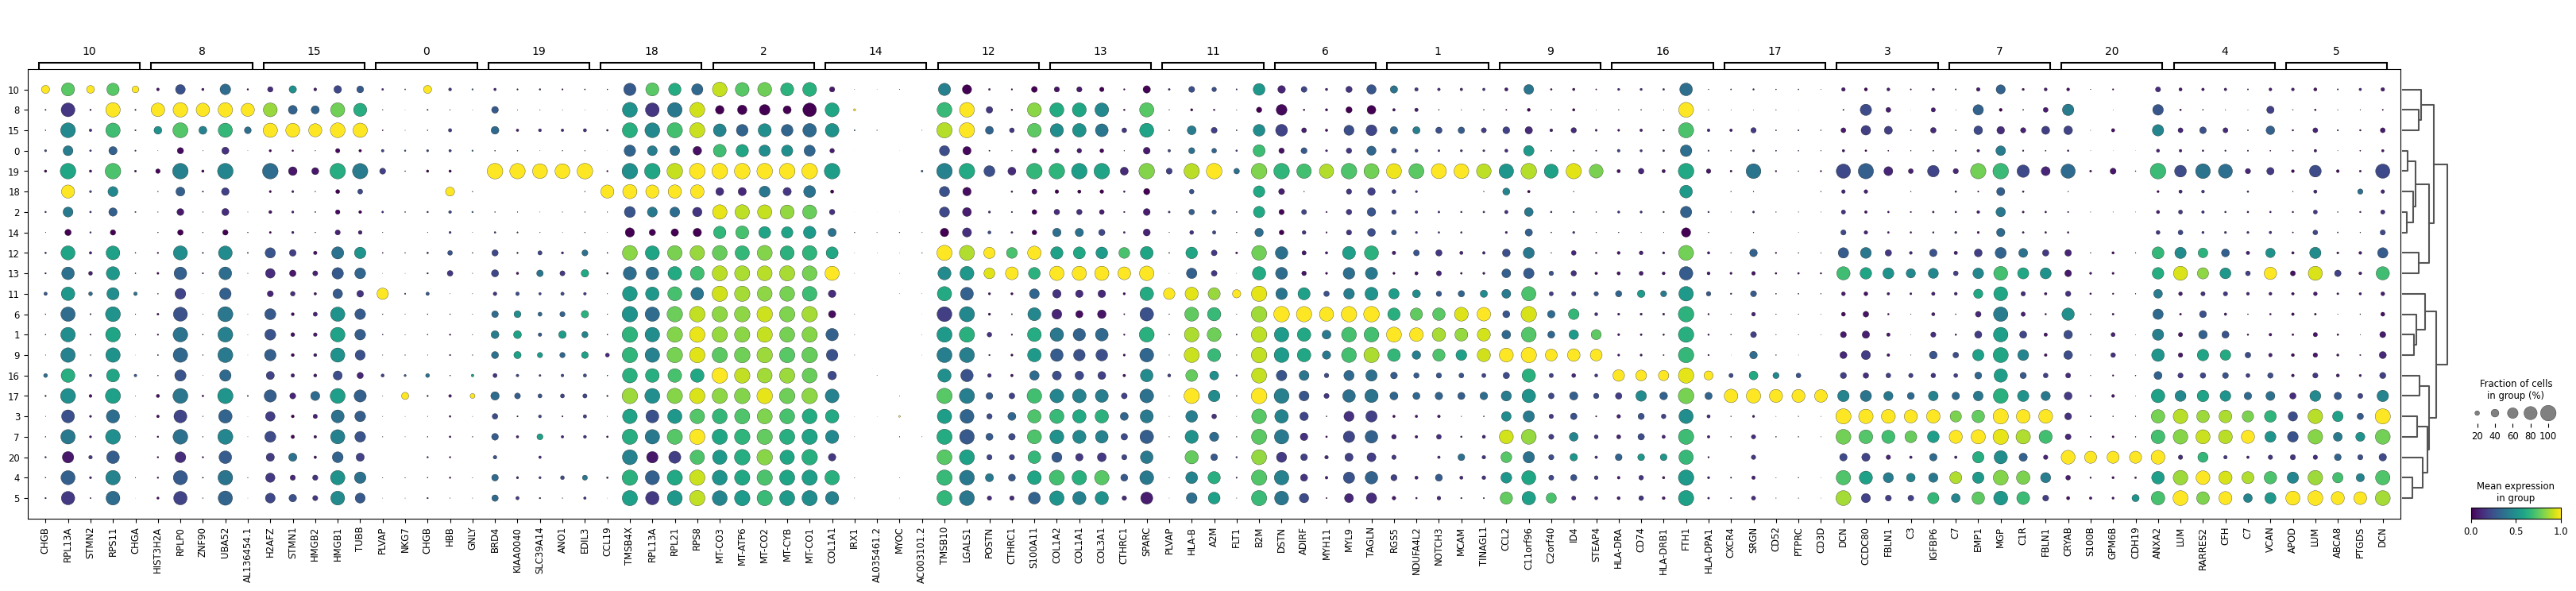

In [18]:
sc.pl.rank_genes_groups_dotplot(fdata,n_genes=5,min_logfoldchange=0.5,standard_scale='var',color_map='viridis')

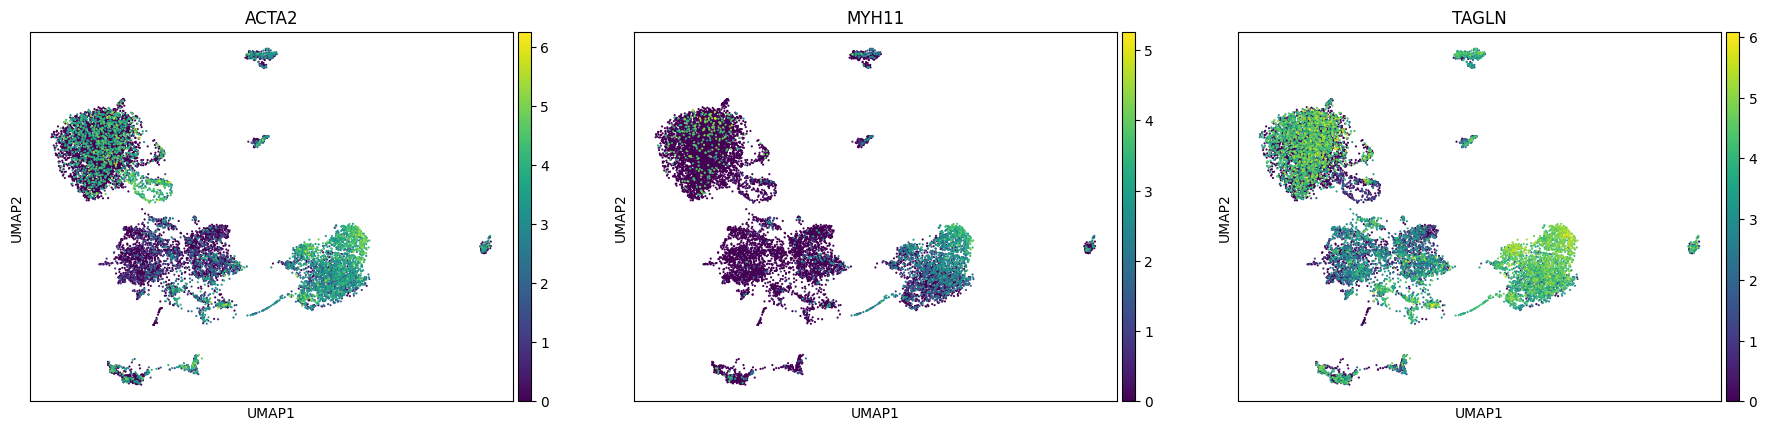

In [19]:
sc.pl.umap(fdata,color=['ACTA2','MYH11','TAGLN'])

In [ ]:
# AMBIGUOUS clusters: 10, 17, 11, 19
# Cluster16 - potentially proliferating cells? ambiguous group - contains non-histone chromosomal high mobility group protein

#
#
# - iCAFs (AMBIGIOUS - ADGRF5: Predicted to act upstream of or within several processes, including glomerular filtration; pharyngeal arch artery morphogenesis; and surfactant homeostasis. Located in cell surface and cytoplasmic vesicle; potentially epithelial;
#### 
## HSPs - all heat shock proteins


#20 - AMBIGUOUS - Glial cells-> CDH19: marker for glioblastoma stem-like cells; CRYAB: involved in reactive astrogliosis in traumatic brain injuries; S100B: peripheral blood brain barrier marker, glial-specific, expressed primarily by astrocytes
#19 - AMBIGUOUS - BRD4: nonspecific; LRRFIP1: prognostic biomarker of glioma; LOXL2: <- same as LRRFIP1; ANO1: GIT associated; KIAA0040: Syncytiotrophoblasts, Skeletal myocytes

#18 - rCAFs - CCL19; TMSB4X - regeneration, tissue repair; + ribosomal markers
#17 - AMBIGUOUS - T cell
#16 - antigen-presenting CAFs (apCAFs)
#15 - Proliferating Endothelial
#14 - mCAFS - COL1A2 and

#13 - mCAFs
#12 - Tumor-like CAFs (tCAFS)

#11 - AMBIGUOUS/endothelial
#10 - AMBIGUOUS - Enteroendocrine? - CHGB- tyrosine-sulfated secretory protein abundant in peptidergic endocrine cells and neurons; CHGA - found in secretory vesicles of neurons and endocrine cells; STMN2 - neuronal growth and osteogenesis
#9 - vCAFs

#8 - AMBIGUOUS - ribosomal protein, dna binding trans factor
#7 - iCAFs
#6 - vCAFs

#Endometrial ;TMSB10 - Non-specific - Mixed function (mainly); LGALS1; S100A11: endometrial
#MGP - Reticular Fibroblasts? https://www.sciencedirect.com/science/article/pii/S0022202X15355226

#5 - mCAFs
#4 - matrix CAFs (mCAFs)  but also potentially iCAFs
#3 - inflammatory CAFs (iCAFs) 
#2 - AMBIGUOUS - MT genes 
#1 - Pericytes
#0 - AMBIGUOUS because contaminated with NK genes and ribosomal genes

In [23]:
pd.DataFrame(fdata.uns['rank_genes_groups']['names']).head(10)

0         1        2        3        4      5      6       7   
0    B2M      RGS5   MT-CO3      DCN      LUM   APOD   DSTN      C7  \
1   TPT1  NDUFA4L2  MT-ATP6   CCDC80  RARRES2    LUM  ADIRF    EMP1   
2  RPL13    NOTCH3   MT-CO2    FBLN1      CFH  ABCA8  MYH11     MGP   
3   RPS2      MCAM   MT-CYB       C3       C7  PTGDS   MYL9     C1R   
4  RPS3A   TINAGL1   MT-CO1   IGFBP6     VCAN    DCN  TAGLN   FBLN1   
5   RPL3     MEF2C   MT-ND1     CST3   COL6A3    OGN  ACTA2     DCN   
6  RPL10   COL18A1   MT-ND4      MGP    TXNIP   GPC3   TPM2    CCL2   
7  RPS14    COL4A2   MT-ND3      GSN   COL3A1  CEBPD   SOD3   IL1R1   
8  RPS18    PDGFRB   MT-ND2  S100A10      C1S  TGFBI  MGST3  CCDC80   
9  RPL32   CHCHD10    RPS18      C1R      DCN    GSN    PLN     GEM   

            8         9  ...       11        12      13       14      15   
0    HIST3H2A      CCL2  ...    PLVAP    TMSB10  COL1A2      VIM   H2AFZ  \
1       RPLP0  C11orf96  ...    HLA-B    LGALS1  COL1A1  MT-ATP6   STMN1   
2       ZNF90   C2orf40  ...      A2M     POSTN  COL3A1   MT-CO1   HMGB2   
3       UBA52       ID4  ...     FLT1    CTHRC1  CTHRC1   MT-CYB   HMGB1   
4  AL136454.1    STEAP4  ...      B2M   S100A11   SPARC   COL1A1    TUBB   
5     SLC25A4    ARID5B  ...    HSPG2     GAPDH     LUM   COL1A2  LGALS1   
6      S100A6     TIMP3  ...    HLA-A     TIMP1   SFRP4   MT-ND4    CKS2   
7       RPS20     TAGLN  ...  SPARCL1  SH3BGRL3    VCAN   MT-CO3   PTTG1   
8       UQCC2   TINAGL1  ...    HLA-C      OST4     FN1     TPT1    PFN1   
9      COMMD1      CD59  ...     STC1     SERF2    CTGF     IRX1    TYMS   

         16        17      18        19     20  
0   HLA-DRA     CXCR4   CCL19      BRD4  CRYAB  
1      CD74      SRGN  TMSB4X  KIAA0040  S100B  
2  HLA-DRB1      CD52  RPL13A  SLC39A14  GPM6B  
3      FTH1     PTPRC   RPL21      ANO1  CDH19  
4  HLA-DPA1      CD3D    RPS8     EDIL3  ANXA2  
5       LYZ   TNFAIP3  RPS15A     LOXL2   LGI4  
6    LAPTM5      CREM   RPL31    ADGRF5   PLP1  
7      SRGN   ARHGDIB   RPLP1   MAP3K20   EMP2  
8  HLA-DQB1      BTG1     HBB   ARHGEF7  FXYD1  
9    MT-CO3  SH3BGRL3  RPL10A   LRRFIP1  ITGB8  

[10 rows x 21 columns]

In [21]:
cellmarker_dict={'T cell':['CD3D','CD44'],
'NK':['NCAM1','NCR1'], 
'Endothelial':['PECAM1','IGFBP2','LY6E'],
'Lymphatic endothelial':['CCL21','PDPN','LYVE1'],
'Proliferating Endothelial':['MKI67','STMN1'],
'Venous endothelial':['LEFTY1','EPHB4'],
'Arterial endothelial':['CXCL12','EPHB2'],
'Fibroblasts':['VIM','LUM','COL1A1'],
'Myofibroblasts':['MYH9','MYH10','MYH11','ACTA2','CALD1','TAGLN'],                 
                 }


/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


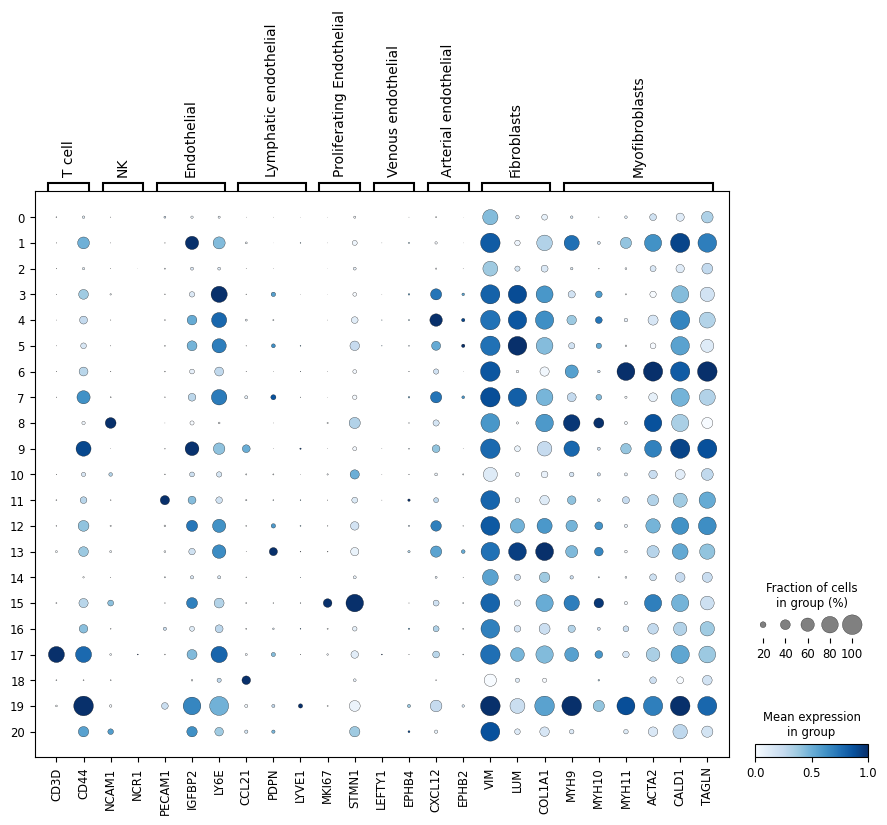

In [22]:
sc.pl.dotplot(fdata, cellmarker_dict, groupby='leiden_E', 
              standard_scale='var',color_map='Blues')

In [24]:
#To map the identified clusters to a cell type annotation label

fibroannot= {
    '0':'Ambiguous',
    '1':'Pericytes',
    '2':'Ambiguous',
    '3':'Inflammatory CAFs',
    '4':'Matrix CAFs',
    '5':'Matrix CAFs',
    '6':'Vascular CAFs',
    '7':'Inflammatory CAFs',
    '8':'Ambiguous',
    '9':'Vascular CAFs',
    '10':'Ambiguous',
    '11':'Ambiguous',
    '12':'Tumor-like CAFs',
    '13':'Matrix CAFs',
    '14':'Matrix CAFs',
    '15':'Proliferating Endothelial',
    '16':'Antigen-Presenting CAFs',
    '17':'T cells',
    '18':'Reticular CAFs',
    '19':'Ambiguous',
    '20':'Glial cells',
}
# add a new '.obs'column called 'cell type' by mapping clusters to annotation using pandas 'map'function
fdata.obs['cell type'] = fdata.obs['leiden_E'].map(fibroannot).astype('category')



/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


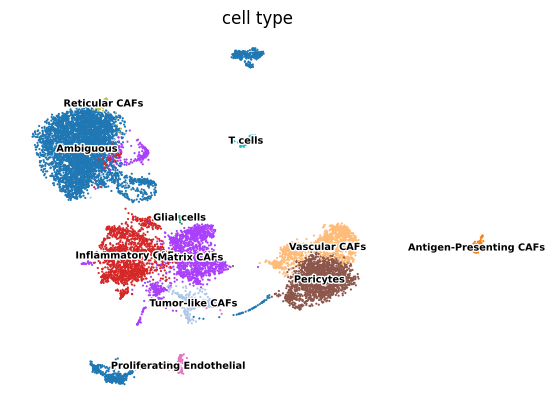

In [25]:
sc.pl.umap(fdata, color='cell type', legend_loc='on data',
           frameon=False, legend_fontsize=7, legend_fontoutline=2)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


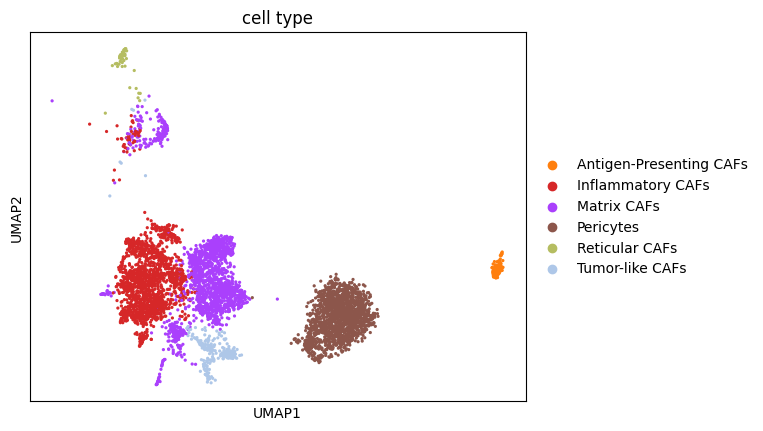

In [26]:
fdata2=fdata[fdata.obs['cell type'].isin(['Pericytes','Matrix CAFs','Reticular CAFs','Inflammatory CAFs','Antigen-Presenting CAFs','Tumor-like CAFs'])].copy()
sc.pl.umap(fdata2,color='cell type')

In [27]:
fdata2.write('fibroblasts_reannot_subset02.h5ad')

In [7]:
#fdata2 = sc.read_h5ad('fibroblasts_subset02.h5ad') #run this if reimporting

In [28]:
fdata2

AnnData object with n_obs × n_vars = 5594 × 7568
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'scrublet_score', 'scrublet_classification', 'CMO301', 'CMO302', 'CMO303', 'CMO304', 'CMO305', 'CMO306', 'CMO307', 'CMO308', 'CMO309', 'CMO310', 'CMO311', 'CMO312', 'Assignment_Probability', 'Assignment', 'new.ident', 'percent.mito', 'percent.ribo', 'log10GenesPerUMI', 'Sample_ID', 'new_ident', 'Sample_SubID', 'Patient', 'MYCNamp', 'Treatment_Stage', 'Sex', 'INSS_Stage', 'INRG_Risk', 'Age_at_diagnosis__months_', 'Anatomical_Site', 'Sample_Type', 'Sequencing_Batch', 'Chromium_Batch', 'Version_Chemistry', 'Fresh_or_Cryopr_', 'Time_from_diagnosis__days_', 'FACS', 'Sequencing_Depth', 'CRv3_Estimated_Cells', 'CRv3_Fraction_of_reads_in_cells____', 'CRv3_Mean_reads_per_cell', 'CRv3_Median_genes_per_cell', 'CRv3_Total_genes_detected', 'CRv3_Warnings_or_Errors', 'Putative_neuroblasts', 'Differentially_expressed_markers', 'Sample_Description', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nFea

In [29]:
fdata2 = fdata2.raw.to_adata()

In [30]:
np.max(fdata2.X)

8.102597

In [31]:
np.min(fdata2.X)

0.0

# Repeat everything from the start to clean up the fibroblast clusters (2nd iteration)

In [32]:
sc.tl.umap(fdata2)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


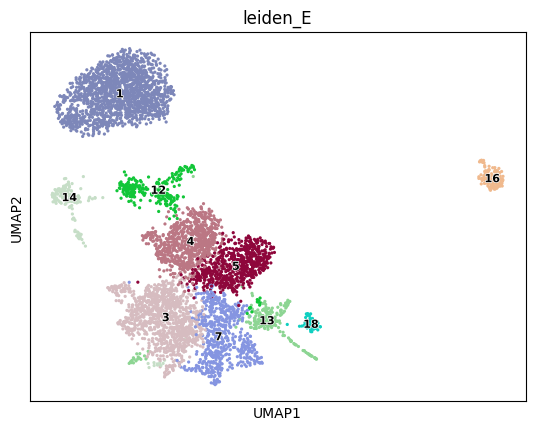

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


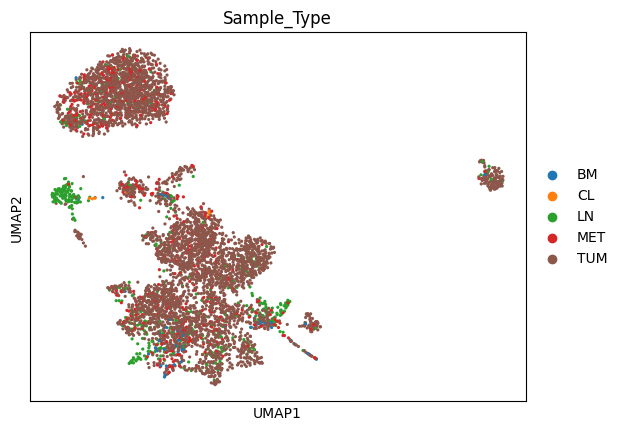

In [33]:
sc.pl.umap(fdata2, color=['leiden_E'], legend_fontsize="8", legend_fontoutline=1, legend_loc='on data')
sc.pl.umap(fdata2, color=['Sample_Type'])

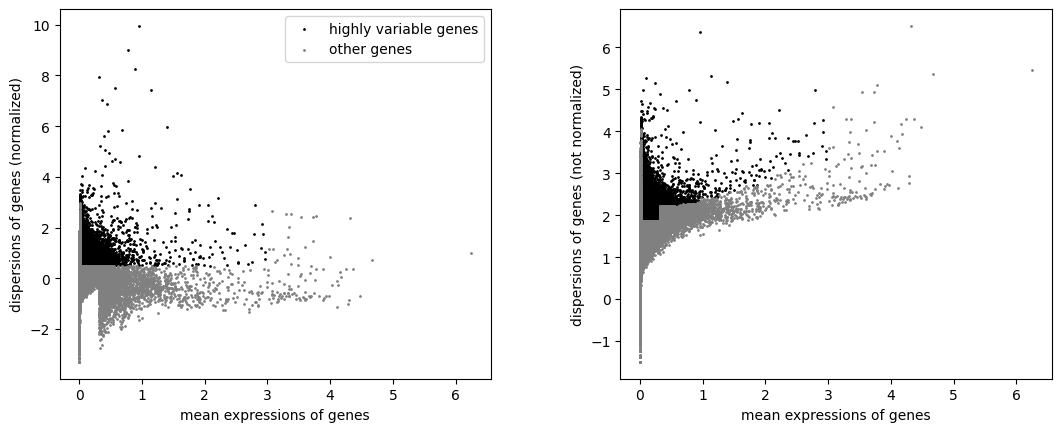

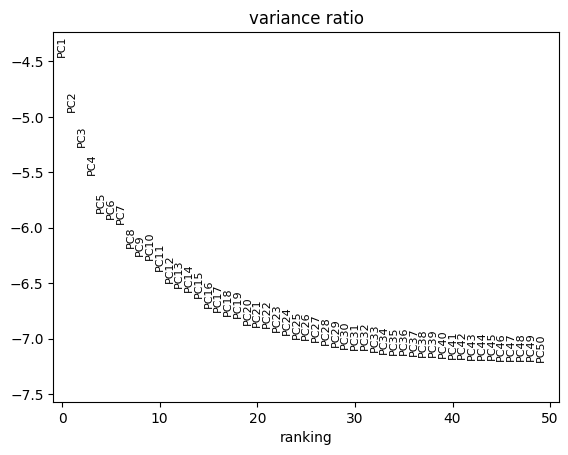

2023-08-10 17:38:20,055 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-08-10 17:38:23,482 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-08-10 17:38:23,513 - harmonypy - INFO - Iteration 1 of 10
2023-08-10 17:38:25,034 - harmonypy - INFO - Iteration 2 of 10
2023-08-10 17:38:26,332 - harmonypy - INFO - Iteration 3 of 10
2023-08-10 17:38:27,600 - harmonypy - INFO - Iteration 4 of 10
2023-08-10 17:38:28,514 - harmonypy - INFO - Iteration 5 of 10
2023-08-10 17:38:29,501 - harmonypy - INFO - Iteration 6 of 10
2023-08-10 17:38:30,375 - harmonypy - INFO - Iteration 7 of 10
2023-08-10 17:38:31,216 - harmonypy - INFO - Iteration 8 of 10
2023-08-10 17:38:32,795 - harmonypy - INFO - Iteration 9 of 10
2023-08-10 17:38:33,677 - harmonypy - INFO - Iteration 10 of 10
2023-08-10 17:38:34,543 - harmonypy - INFO - Stopped before convergence


In [34]:
try:
    fdata2.uns.pop("log1p")
except:
    pass
sc.pp.highly_variable_genes(fdata2, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(fdata2)
fdata2.raw = fdata2
fdata2 = fdata2[:, fdata2.var.highly_variable]
sc.pp.regress_out(fdata2, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(fdata2, max_value=10)
sc.tl.pca(fdata2, svd_solver='arpack')
sc.pl.pca_variance_ratio(fdata2, log=True, n_pcs = 50)
sc.external.pp.harmony_integrate(fdata2, key="Sample_ID")
sc.pp.neighbors(fdata2,use_rep = 'X_pca_harmony',n_neighbors = 10, n_pcs=40)
sc.tl.umap(fdata2, min_dist = 0.3)

In [35]:
fdata2.write('fibroblasts_reannot_subset02_postscale.h5ad')

In [5]:
#fdata2 = sc.read_h5ad('fibroblasts_subset02_postscale.h5ad')###(prior steps do not need to be run after importing this re-annotated labels)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


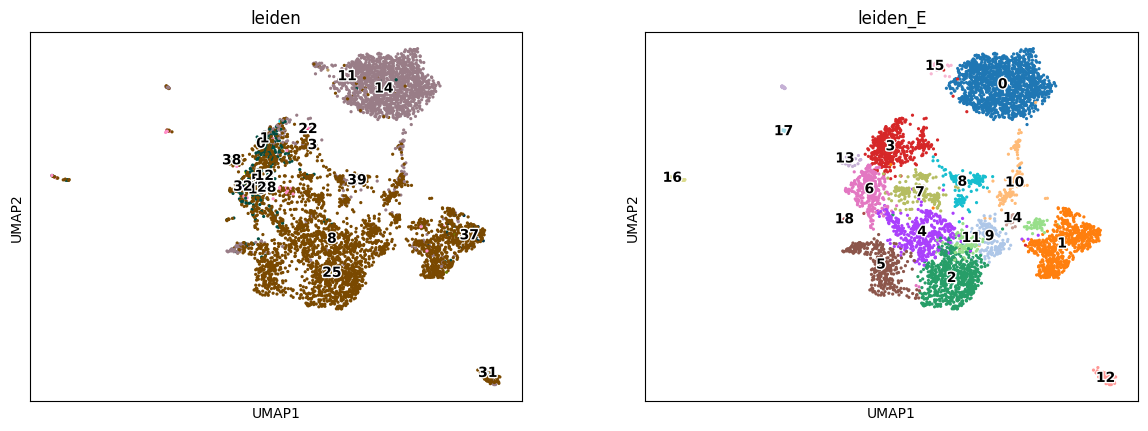

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


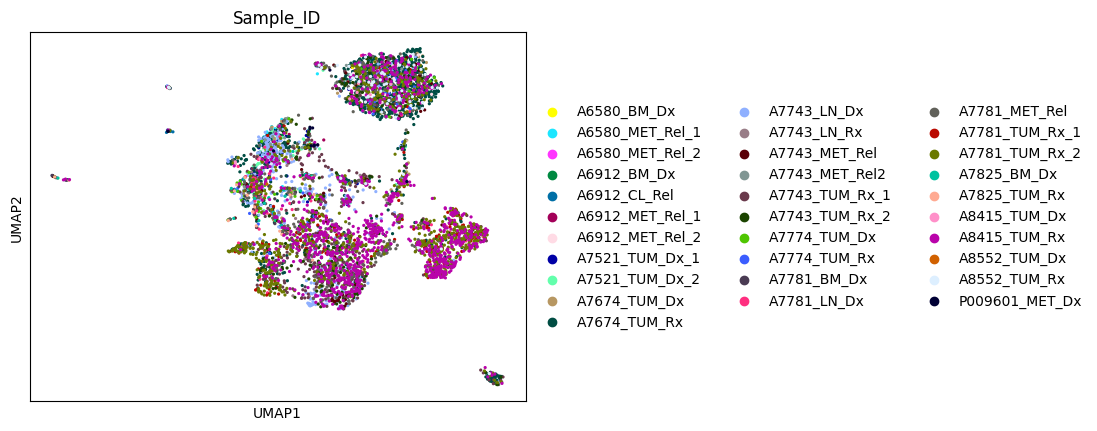

In [36]:
sc.tl.leiden(fdata2, key_added = "leiden_E")
sc.pl.umap(fdata2, color=['leiden', "leiden_E"], legend_fontoutline=2, legend_loc='on data')
sc.pl.umap(fdata2, color=['Sample_ID'])

In [37]:
fdata2.write('fibro_reannot_subset02.h5ad')

In [38]:
sc.tl.rank_genes_groups(fdata2,groupby='leiden_E', method='wilcoxon')

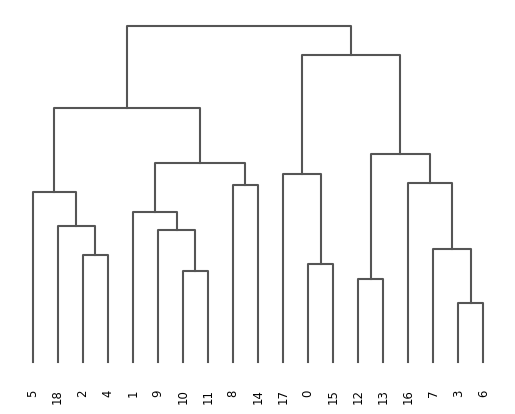

<Axes: >

In [39]:
sc.tl.dendrogram(fdata2,groupby='leiden_E')
sc.pl.dendrogram(fdata2,groupby='leiden_E')

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


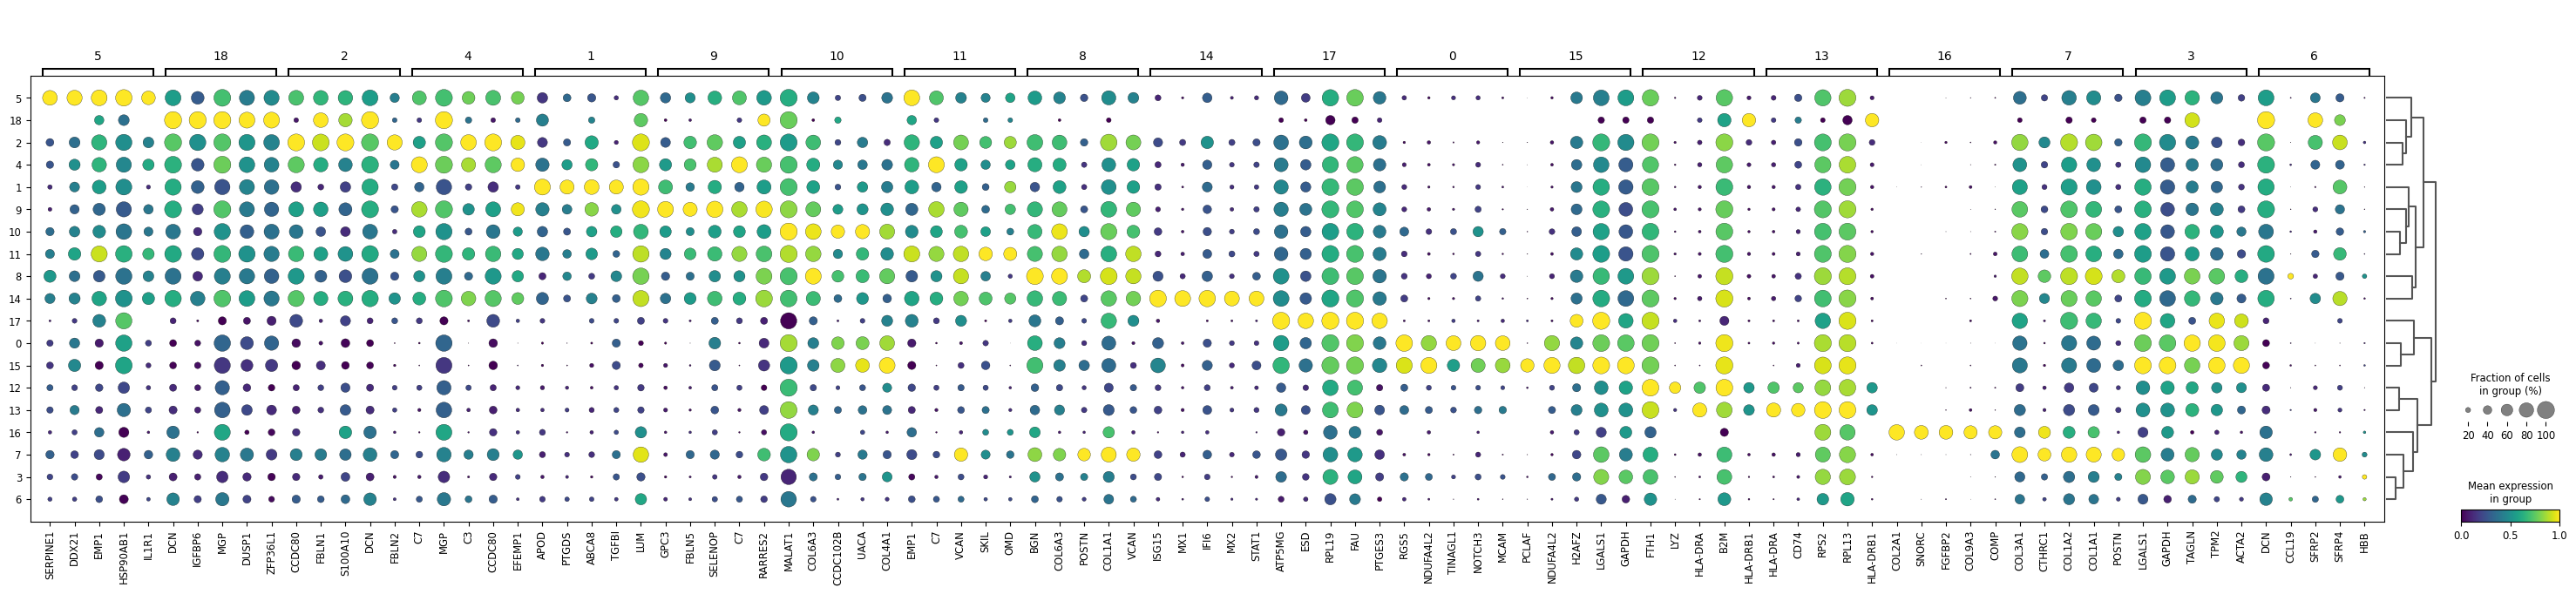

In [40]:
sc.pl.rank_genes_groups_dotplot(fdata2,n_genes=5,min_logfoldchange=0.5, standard_scale='var',color_map='viridis')

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


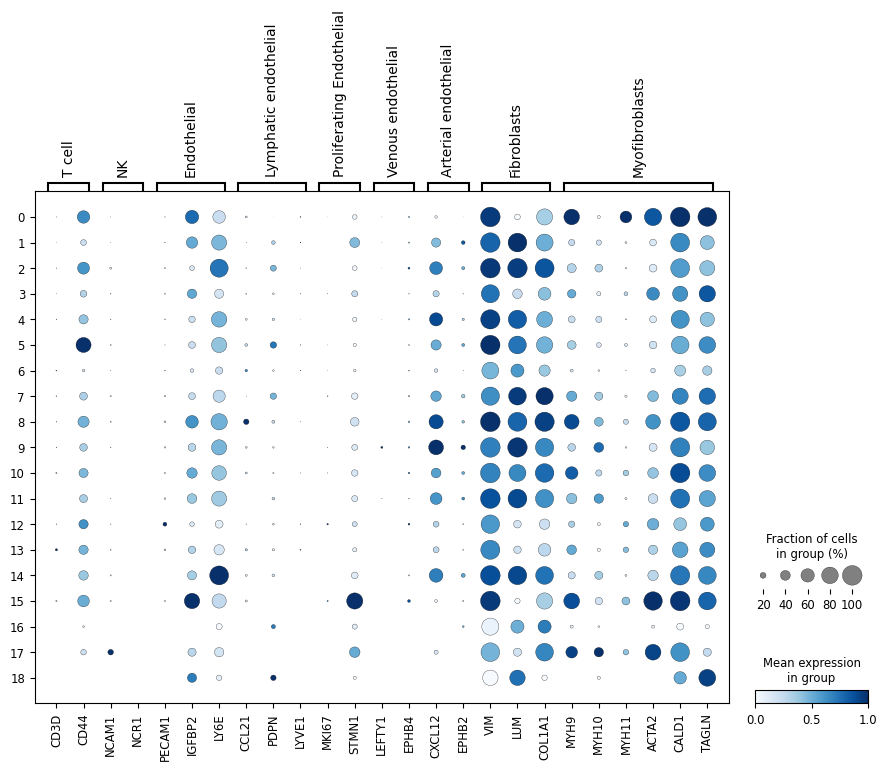

In [41]:
sc.pl.dotplot(fdata2, cellmarker_dict, groupby='leiden_E', 
              standard_scale='var',color_map='Blues')

In [43]:
pd.DataFrame(fdata2.uns['rank_genes_groups']['names']).head(10)

0       1        2       3         4          5      6       7   
0      RGS5    APOD   CCDC80  LGALS1        C7   SERPINE1    DCN  COL3A1  \
1  NDUFA4L2   PTGDS    FBLN1  TMSB10       MGP      DDX21  CCL19  CTHRC1   
2   TINAGL1   ABCA8  S100A10   GAPDH        C3       EMP1  RPS18  COL1A2   
3    NOTCH3   TGFBI      DCN    RPS2    CCDC80   HSP90AB1    LUM  COL1A1   
4      MCAM     LUM    FBLN2   RPS3A    EFEMP1      IL1R1  SFRP2   POSTN   
5      TPM2   CLDN1     CST3   RPLP2   SELENOP       LDHA  RPS14   SFRP4   
6     MEF2C  CYP1B1     MMP2   RPS18  SERPINF1      PLAUR  SFRP4     LUM   
7      MYL9   THBS4    MFAP4    ACTB       DCN  TNFRSF12A    HBB    VCAN   
8   COL18A1   SCN7A      CLU  TMSB4X     FBLN1       NPM1  RPL13   AEBP1   
9  PPP1R14A   CEBPD     PI16  RPL18A      JUNB       UAP1  CCL21   SPARC   

         8        9        10    11        12        13      14        15   
0      BGN     GPC3    MALAT1  EMP1      FTH1   HLA-DRA   ISG15     PCLAF  \
1   COL6A3    FBLN5    COL6A3    C7       LYZ      CD74     MX1  NDUFA4L2   
2    POSTN  SELENOP  CCDC102B  VCAN   HLA-DRA      RPS2    IFI6     H2AFZ   
3   COL1A1       C7      UACA  SKIL       B2M     RPL13     MX2    LGALS1   
4     VCAN  RARRES2    COL4A1   OMD  HLA-DRB1  HLA-DRB1   STAT1     GAPDH   
5   COL3A1    TXNIP    COL3A1  BTG2    MT-CO3      CD52  IFI44L    RANBP1   
6  EMILIN1  ALDH1A1     DDX17  MEG3    S100A9  HLA-DPA1   IFIT3     UQCRH   
7    AEBP1    LTBP4       DST  FOSB    TYROBP     CD79A    LY6E     CYTOR   
8   CTHRC1  LAPTM4A    COL1A2  MCL1      CD74  HLA-DPB1    OAS1     RPL35   
9   COL1A2      MGP    ARGLU1  WSB1      AIF1    MT-CO3   IFI35     STMN1   

        16        17        18  
0   COL2A1    ATP5MG       DCN  
1    SNORC       ESD    IGFBP6  
2   FGFBP2     RPL19       MGP  
3   COL9A3       FAU     DUSP1  
4     COMP    PTGES3   ZFP36L1  
5  COL11A1     UBA52     SFRP2  
6   COL9A2  HIST3H2A  HLA-DRB1  
7   COL9A1     RPLP0     FBLN1  
8    S100B    HNRNPM     CYR61  
9     RBP4      RPL8   ALDH1A1

In [44]:
# Cluster 5 - heat shock protein, PLAUR and ILR1 - PLAUR encodes the urokinase receptor (uPAR), which promotes cell survival, migration, and resistance to targeted cancer therapeutics in glioblastoma cells in culture and in mouse model systems
# https://www.nature.com/articles/s41598-018-21358-1
#12 - UACA, MALAT1 - cancer associated markers
#15 - PCLAF - promotes prolif of neuroblastoma cells
fibroannot2= {
    '0':'Pericytes',
    '1':'mCAFs',
    '2':'mCAFs',
    '3':'tCAFs',
    '4':'iCAFs',
    '5':'tCAFs',
    '6':'rCAFs',
    '7':'mCAFs',
    '8':'mCAFs',
    '9':'iCAFs',
    '10':'tCAFs',
    '11':'iCAFs',
    '12':'apCAFs',
    '13':'apCAFs',
    '14':'Ambiguous',
    '15':'tCAFs',
    '16':'mCAFs',
    '17':'Ambiguous',
    '18':'Ambiguous',

}
# add a new '.obs'column called 'cell type' by mapping clusters to annotation using pandas 'map'function
fdata2.obs['cell type'] = fdata2.obs['leiden_E'].map(fibroannot2).astype('category')

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


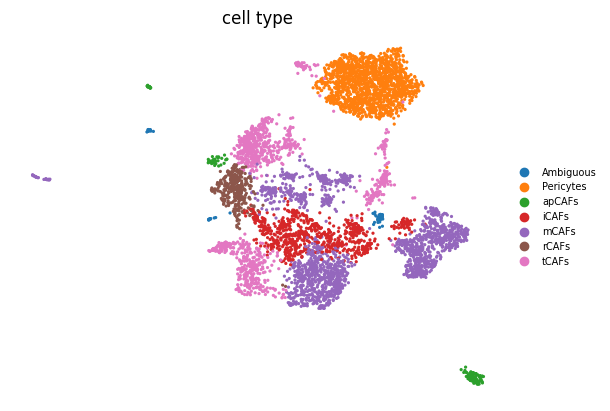

In [45]:
sc.pl.umap(fdata2, color='cell type',
           frameon=False, legend_fontsize=7, legend_fontoutline=2)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


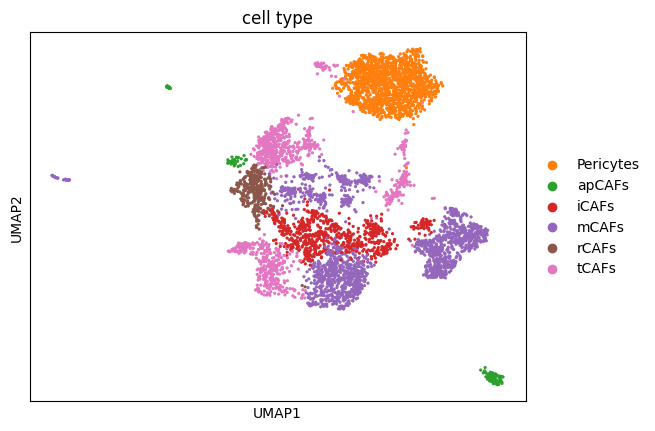

In [46]:
fdata3=fdata2[fdata2.obs['cell type'].isin(['iCAFs','mCAFs','apCAFs','rCAFs','Pericytes','tCAFs' ])].copy()
sc.pl.umap(fdata3,color='cell type')

In [47]:
fdata3.write('fibro_reannot_subset03.h5ad', compression = 'gzip')

In [48]:
fdata3=fdata3.raw.to_adata()


In [49]:
fdata3

AnnData object with n_obs × n_vars = 5525 × 26829
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'scrublet_score', 'scrublet_classification', 'CMO301', 'CMO302', 'CMO303', 'CMO304', 'CMO305', 'CMO306', 'CMO307', 'CMO308', 'CMO309', 'CMO310', 'CMO311', 'CMO312', 'Assignment_Probability', 'Assignment', 'new.ident', 'percent.mito', 'percent.ribo', 'log10GenesPerUMI', 'Sample_ID', 'new_ident', 'Sample_SubID', 'Patient', 'MYCNamp', 'Treatment_Stage', 'Sex', 'INSS_Stage', 'INRG_Risk', 'Age_at_diagnosis__months_', 'Anatomical_Site', 'Sample_Type', 'Sequencing_Batch', 'Chromium_Batch', 'Version_Chemistry', 'Fresh_or_Cryopr_', 'Time_from_diagnosis__days_', 'FACS', 'Sequencing_Depth', 'CRv3_Estimated_Cells', 'CRv3_Fraction_of_reads_in_cells____', 'CRv3_Mean_reads_per_cell', 'CRv3_Median_genes_per_cell', 'CRv3_Total_genes_detected', 'CRv3_Warnings_or_Errors', 'Putative_neuroblasts', 'Differentially_expressed_markers', 'Sample_Description', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nFe

# Repeat everything from the start to clean up the fibroblast clusters (3nd iteration)

In [50]:
sc.tl.umap(fdata3)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


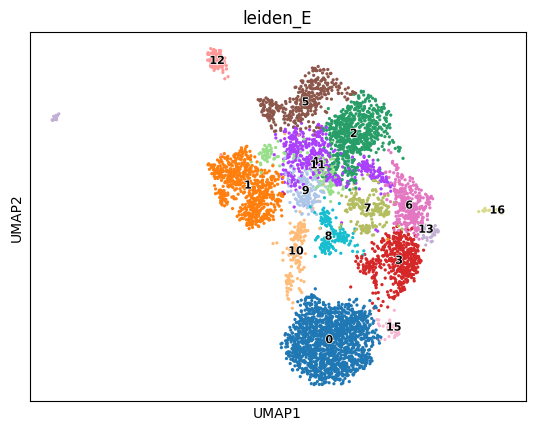

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


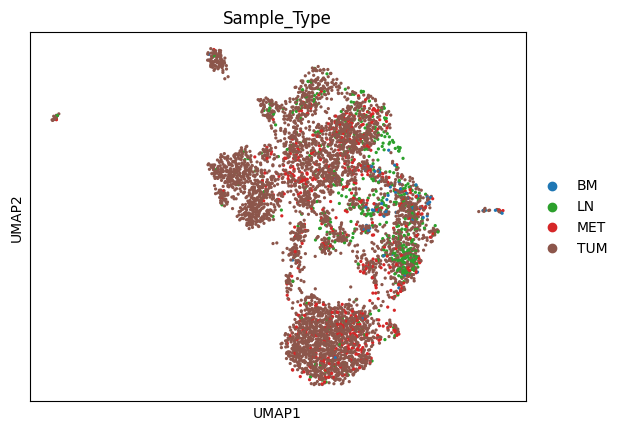

In [51]:
sc.pl.umap(fdata3, color=['leiden_E'], legend_fontsize="8", legend_fontoutline=1, legend_loc='on data')
sc.pl.umap(fdata3, color=['Sample_Type'])

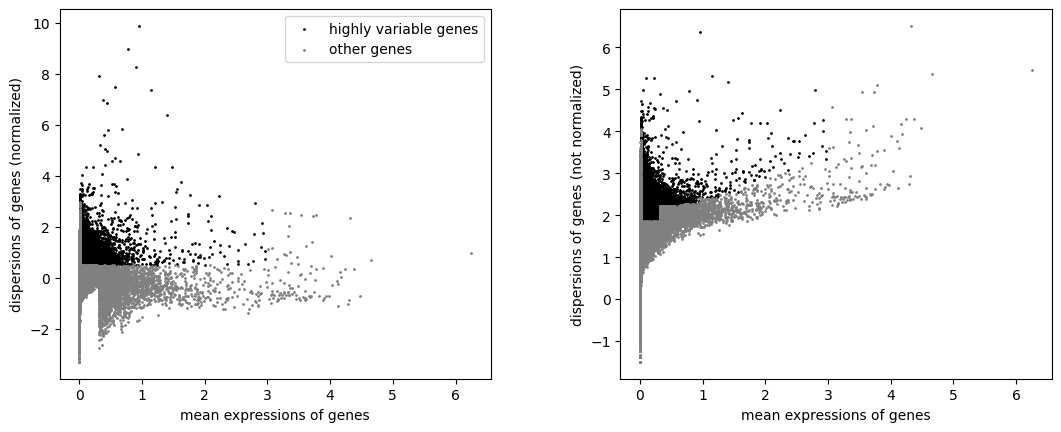

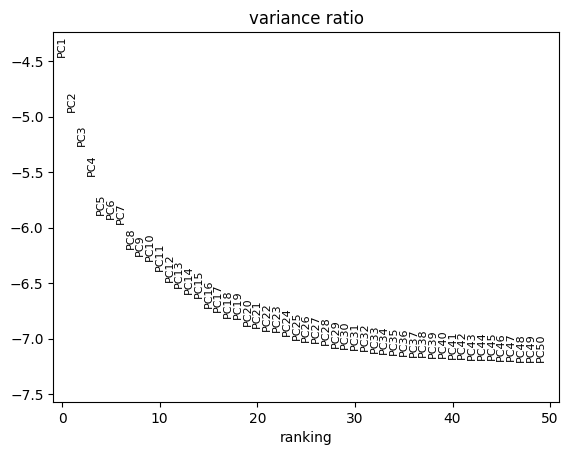

2023-08-10 18:31:10,774 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2023-08-10 18:31:13,562 - harmonypy - INFO - sklearn.KMeans initialization complete.
2023-08-10 18:31:13,589 - harmonypy - INFO - Iteration 1 of 10
2023-08-10 18:31:15,141 - harmonypy - INFO - Iteration 2 of 10
2023-08-10 18:31:16,609 - harmonypy - INFO - Iteration 3 of 10
2023-08-10 18:31:17,925 - harmonypy - INFO - Iteration 4 of 10
2023-08-10 18:31:19,166 - harmonypy - INFO - Iteration 5 of 10
2023-08-10 18:31:20,862 - harmonypy - INFO - Iteration 6 of 10
2023-08-10 18:31:21,756 - harmonypy - INFO - Iteration 7 of 10
2023-08-10 18:31:22,761 - harmonypy - INFO - Iteration 8 of 10
2023-08-10 18:31:23,422 - harmonypy - INFO - Iteration 9 of 10
2023-08-10 18:31:24,383 - harmonypy - INFO - Iteration 10 of 10
2023-08-10 18:31:25,278 - harmonypy - INFO - Stopped before convergence


In [52]:
try:
    fdata3.uns.pop("log1p")
except:
    pass
sc.pp.highly_variable_genes(fdata3, min_mean=0.0125, max_mean=3, min_disp=0.5)
sc.pl.highly_variable_genes(fdata3)
fdata3.raw = fdata3
fdata3 = fdata3[:, fdata3.var.highly_variable]
sc.pp.regress_out(fdata3, ['total_counts', 'pct_counts_mt'])
sc.pp.scale(fdata3, max_value=10)
sc.tl.pca(fdata3, svd_solver='arpack')
sc.pl.pca_variance_ratio(fdata3, log=True, n_pcs = 50)
sc.external.pp.harmony_integrate(fdata3, key="Sample_ID")
sc.pp.neighbors(fdata3,use_rep = 'X_pca_harmony',n_neighbors = 10, n_pcs=40)
sc.tl.umap(fdata3, min_dist = 0.3)

In [53]:
fdata3.write('fibroblasts_reannot_subset03_postscale.h5ad')

In [54]:
#using numpy

np.max(fdata3.X)

10.0

In [55]:
np.min(fdata3.X)

-3.7705774

In [5]:
#fdata3 = sc.read_h5ad('fibro_subset03.h5ad')###after re-annotation

In [72]:
fdata3

AnnData object with n_obs × n_vars = 4813 × 3612
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'scrublet_score', 'scrublet_classification', 'CMO301', 'CMO302', 'CMO303', 'CMO304', 'CMO305', 'CMO306', 'CMO307', 'CMO308', 'CMO309', 'CMO310', 'CMO311', 'CMO312', 'Assignment_Probability', 'Assignment', 'new.ident', 'percent.mito', 'percent.ribo', 'log10GenesPerUMI', 'Sample_ID', 'new_ident', 'Sample_SubID', 'Patient', 'MYCNamp', 'Treatment_Stage', 'Sex', 'INSS_Stage', 'INRG_Risk', 'Age_at_diagnosis__months_', 'Anatomical_Site', 'Sample_Type', 'Sequencing_Batch', 'Chromium_Batch', 'Version_Chemistry', 'Fresh_or_Cryopr_', 'Time_from_diagnosis__days_', 'FACS', 'Sequencing_Depth', 'CRv3_Estimated_Cells', 'CRv3_Fraction_of_reads_in_cells____', 'CRv3_Mean_reads_per_cell', 'CRv3_Median_genes_per_cell', 'CRv3_Total_genes_detected', 'CRv3_Warnings_or_Errors', 'Putative_neuroblasts', 'Differentially_expressed_markers', 'Sample_Description', 'S.Score', 'G2M.Score', 'Phase', 'nCount_SCT', 'nFea

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(
/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


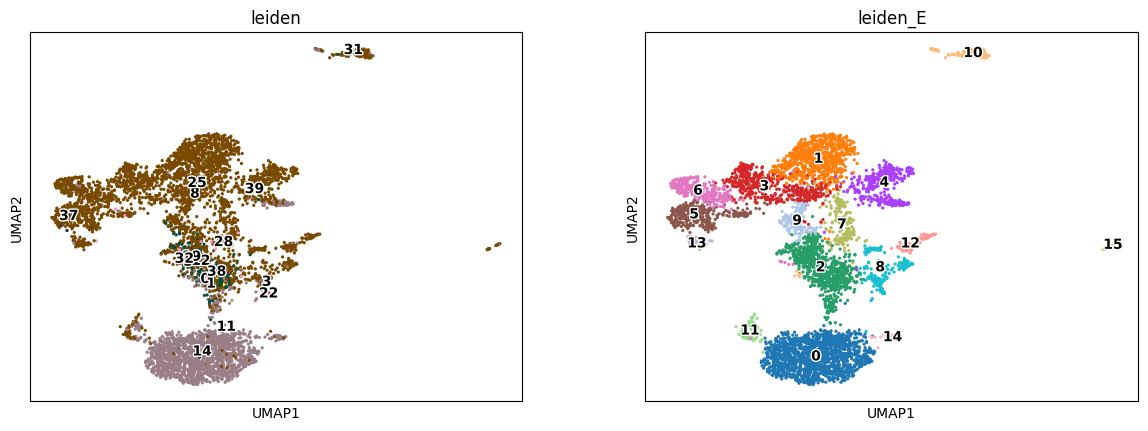

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


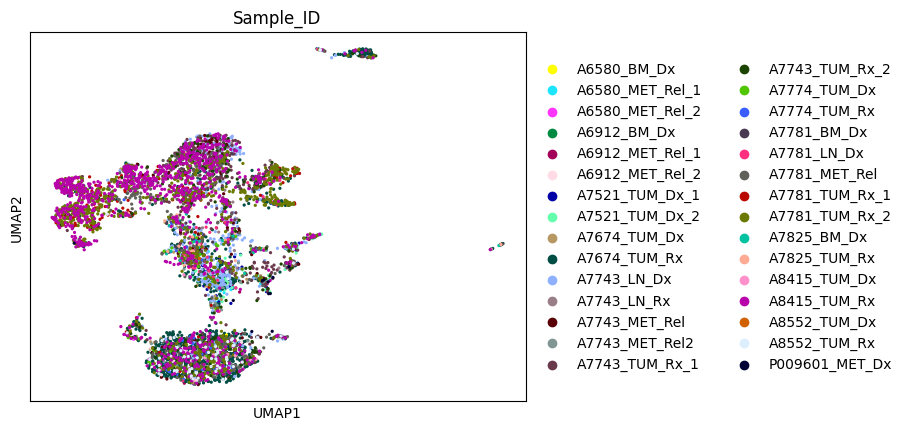

In [56]:
sc.tl.leiden(fdata3, key_added = "leiden_E")
sc.pl.umap(fdata3, color=['leiden', "leiden_E"], legend_fontoutline=2, legend_loc='on data')
sc.pl.umap(fdata3, color=['Sample_ID'])

In [57]:
fdata3.write('fibro_reannot_subset03.h5ad')

In [58]:
sc.tl.rank_genes_groups(fdata3,groupby='leiden_E', method='wilcoxon')

In [59]:
sc.tl.dendrogram(fdata3,groupby='leiden_E')

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


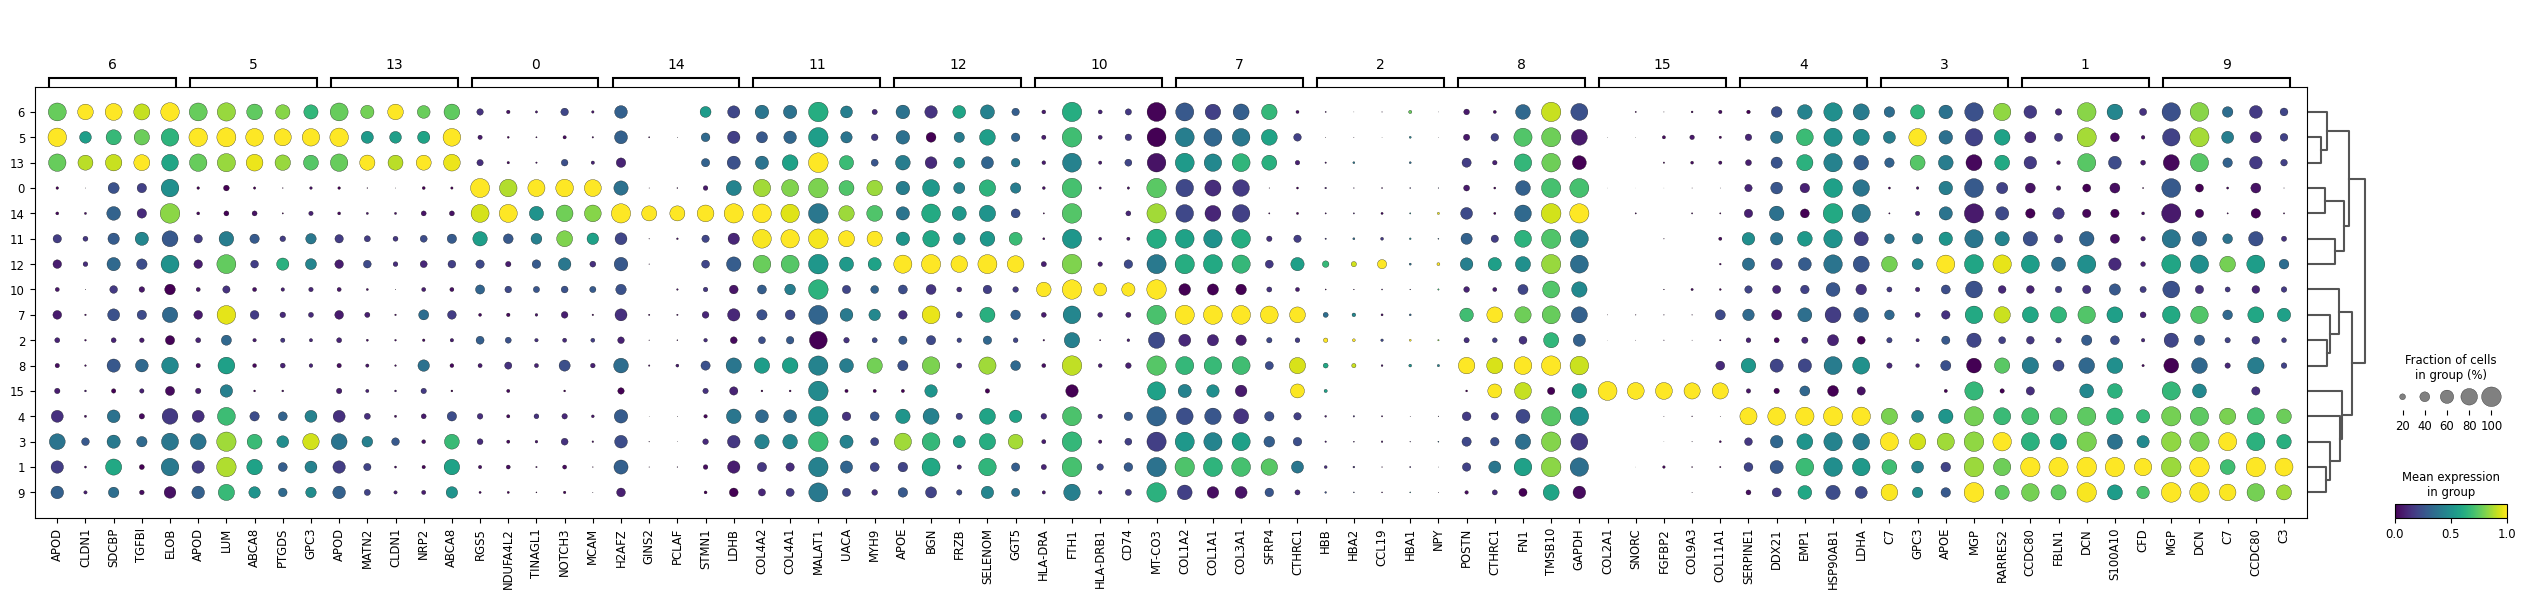

In [60]:
sc.pl.rank_genes_groups_dotplot(fdata3,n_genes=5,min_logfoldchange=0.5, standard_scale='var',color_map='viridis')

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


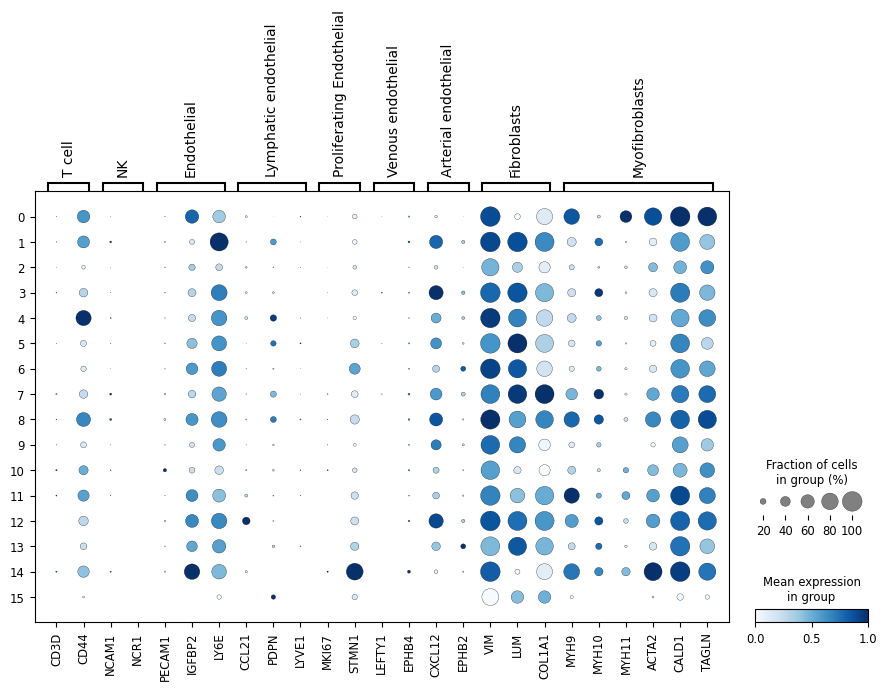

In [61]:
sc.pl.dotplot(fdata3, cellmarker_dict, groupby='leiden_E', 
              standard_scale='var',color_map='Blues')

In [62]:
pd.DataFrame(fdata3.uns['rank_genes_groups']['names']).head(10)

0        1       2        3          4       5        6       7   
0      RGS5   CCDC80   RPS18       C7   SERPINE1    APOD     APOD  COL1A2  \
1  NDUFA4L2    FBLN1   RPL13     GPC3      DDX21     LUM    CLDN1  COL1A1   
2   TINAGL1      DCN   RPS3A     APOE       EMP1   ABCA8    SDCBP  COL3A1   
3    NOTCH3  S100A10   RPS14      MGP   HSP90AB1   PTGDS    TGFBI   SFRP4   
4      MCAM      CFD   RPLP1  RARRES2       LDHA    GPC3     ELOB  CTHRC1   
5      TPM2    FBLN2   RPL10   EFEMP1      IL1R1  CYP1B1   MYL12B    VCAN   
6     MEF2C     CST3   RPS12    FBLN5      PLAUR   SCN7A   SBSPON   SPARC   
7   COL18A1     MMP2    RPS2      OGN       NPM1     CFH  C2orf40     LUM   
8      MYL9       C3  TMSB4X      CFH  TNFRSF12A   CEBPD    THBS4     BGN   
9  PPP1R14A    MFAP4   RPL19  SELENOP      FOSL1   CDH19    MEOX2  COL8A1   

        8        9        10      11       12     13      14       15  
0   POSTN      MGP   HLA-DRA  COL4A2     APOE   APOD   H2AFZ   COL2A1  
1  CTHRC1      DCN      FTH1  COL4A1      BGN  MATN2   GINS2    SNORC  
2     FN1       C7  HLA-DRB1  MALAT1     FRZB  CLDN1   PCLAF   FGFBP2  
3  TMSB10   CCDC80      CD74    UACA  SELENOM   NRP2   STMN1   COL9A3  
4   GAPDH       C3    MT-CO3    MYH9     GGT5  ABCA8    LDHB  COL11A1  
5   ARL4C    FBLN1       B2M  ADGRF5   COL6A3  TGFBI  COX4I2     COMP  
6   PLOD2      GSN  HLA-DPA1   NEAT1     CTSK    OGN   RPL35   COL9A2  
7     FAP      FTL       LYZ  COL6A3  RARRES2   TCF4   GAPDH   COL9A1  
8  LGALS1  SELENOP    LAPTM5   DDX17      MDK  LAMB1   UQCRH     RBP4  
9     PKM      CFD     RPS3A  NOTCH3     CTSH    DST   FABP5    S100B

In [70]:
#14 - mural cells over myofibroblasts since only mural cell markers highly expressed and not fibroblasts
#1 - Can't find a particular subset of 1 - just it being fibroblasts - no cancer enriched markers either
#13 - Very small subset - could be reticular fibroblasts if further literature confirms MGP is a marker
fibroannot3= {
    '0':'Pericytes',
    '1':'Fibroblasts',
    '2':'Ambiguous',
    '3':'tCAFs',
    '4':'tCAFs',
    '5':'mCAFs',
    '6':'iCAFs',
    '7':'mCAFS',
    '8':'mCAFs',
    '9':'iCAFs',
    '10':'apCAFs',
    '11':'tCAFs',
    '12':'Ambiguous',
    '13':'tCAFs',
    '14':'tCAFs',
    '15':'mCAFs'

}
# add a new '.obs'column called 'cell type' by mapping clusters to annotation using pandas 'map'function
fdata3.obs['cell type'] = fdata3.obs['leiden_E'].map(fibroannot3).astype('category')

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


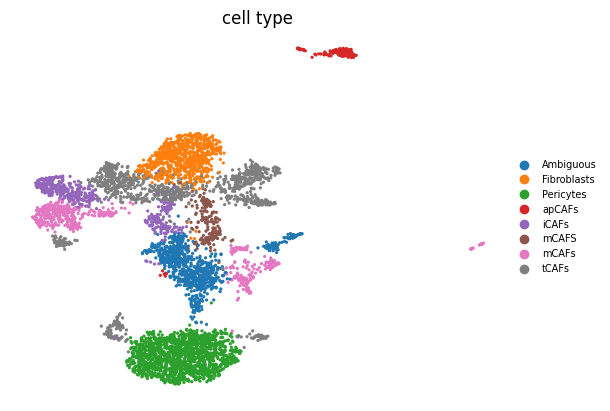

In [73]:
sc.pl.umap(fdata3, color='cell type',
           frameon=False, legend_fontsize=7, legend_fontoutline=2)

/Users/nicoleanngunn/anaconda3/envs/nb/lib/python3.10/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


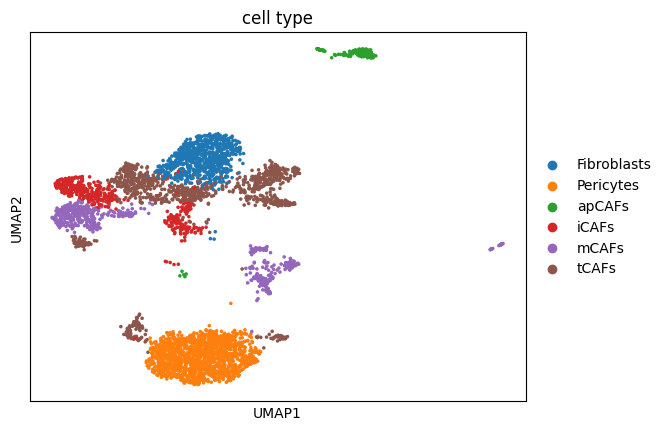

In [72]:
fdata4=fdata3[fdata3.obs['cell type'].isin(['tCAFs','mCAFs','iCAFs','apCAFs','Pericytes', 'Fibroblasts'])].copy()
sc.pl.umap(fdata4,color='cell type')

In [74]:
fdata4.write('fibro_reannot_subset04.h5ad', compression = 'gzip')

In [75]:
import tools

In [76]:
tools.combine_two_categories(fdata4,A='Sample_Type', B='cell type')

In [77]:
fdata4.obs

orig.ident  nCount_RNA   
CGATGGCCAGGGTTAG-1_1_1_1_1_1_1_1_1_1_1_1_1_1  A6580_MET_Rel_1        1197  \
GTGCGGTTCGCAAGCC-1_1_1_1_1_1_1_1_1_1_1_1_1_1  A6580_MET_Rel_1        2249   
AAGCCATTCCTAACAG-1_2_1_1_1_1_1_1_1_1_1_1_1_1      A6912_BM_Dx        4934   
CCGTGGACAAGGGTCA-1_1_1_1_1_1_1_1_1_1_1_1      A6912_MET_Rel_1        6896   
CTTAACTCAGCCTGTG-1_1_1_1_1_1_1_1_1_1_1_1      A6912_MET_Rel_1       15670   
...                                                       ...         ...   
ATTTCTGAGTCATCCA-1                             P009601_MET_Dx       39463   
GACCGTGAGACCGTTT-1                             P009601_MET_Dx        4774   
TGAACGTCAGATACTC-1                             P009601_MET_Dx       10138   
TGTTCCGTCCTTATCA-1                             P009601_MET_Dx       39093   
TTGAGTGCACCGCTAG-1                             P009601_MET_Dx        4363   

                                              nFeature_RNA  scrublet_score   
CGATGGCCAGGGTTAG-1_1_1_1_1_1_1_1_1_1_1_1_1_1           687        0.087719  \
GTGCGGTTCGCAAGCC-1_1_1_1_1_1_1_1_1_1_1_1_1_1          1017        0.078611   
AAGCCATTCCTAACAG-1_2_1_1_1_1_1_1_1_1_1_1_1_1          2186        0.062837   
CCGTGGACAAGGGTCA-1_1_1_1_1_1_1_1_1_1_1_1              2219        0.181818   
CTTAACTCAGCCTGTG-1_1_1_1_1_1_1_1_1_1_1_1              4510        0.372093   
...                                                    ...             ...   
ATTTCTGAGTCATCCA-1                                    5510        0.060649   
GACCGTGAGACCGTTT-1                                    1660        0.026052   
TGAACGTCAGATACTC-1                                    2507        0.194030   
TGTTCCGTCCTTATCA-1                                    5355        0.057851   
TTGAGTGCACCGCTAG-1                                    1512        0.089005   

                                              scrublet_classification  CMO301   
CGATGGCCAGGGTTAG-1_1_1_1_1_1_1_1_1_1_1_1_1_1                    False     NaN  \
GTGCGGTTCGCAAGCC-1_1_1_1_1_1_1_1_1_1_1_1_1_1                    False     NaN   
AAGCCATTCCTAACAG-1_2_1_1_1_1_1_1_1_1_1_1_1_1                    False     NaN   
CCGTGGACAAGGGTCA-1_1_1_1_1_1_1_1_1_1_1_1                        False     NaN   
CTTAACTCAGCCTGTG-1_1_1_1_1_1_1_1_1_1_1_1                        False     NaN   
...                                                               ...     ...   
ATTTCTGAGTCATCCA-1                                              False     3.0   
GACCGTGAGACCGTTT-1                                              False     1.0   
TGAACGTCAGATACTC-1                                              False     1.0   
TGTTCCGTCCTTATCA-1                                              False     1.0   
TTGAGTGCACCGCTAG-1                                              False     0.0   

                                              CMO302   CMO303  CMO304  CMO305   
CGATGGCCAGGGTTAG-1_1_1_1_1_1_1_1_1_1_1_1_1_1     NaN      NaN     NaN     NaN  \
GTGCGGTTCGCAAGCC-1_1_1_1_1_1_1_1_1_1_1_1_1_1     NaN      NaN     NaN     NaN   
AAGCCATTCCTAACAG-1_2_1_1_1_1_1_1_1_1_1_1_1_1     NaN      NaN     NaN     NaN   
CCGTGGACAAGGGTCA-1_1_1_1_1_1_1_1_1_1_1_1         NaN      NaN     NaN     NaN   
CTTAACTCAGCCTGTG-1_1_1_1_1_1_1_1_1_1_1_1         NaN      NaN     NaN     NaN   
...                                              ...      ...     ...     ...   
ATTTCTGAGTCATCCA-1                               5.0   3517.0   390.0     5.0   
GACCGTGAGACCGTTT-1                              11.0   9557.0    68.0     8.0   
TGAACGTCAGATACTC-1                              20.0  10389.0   443.0    28.0   
TGTTCCGTCCTTATCA-1                               7.0   3322.0   456.0    13.0   
TTGAGTGCACCGCTAG-1                              16.0   4495.0   110.0    17.0   

                                              ...  TCell_Signature   
CGATGGCCAGGGTTAG-1_1_1_1_1_1_1_1_1_1_1_1_1_1  ...        -0.929044  \
GTGCGGTTCGCAAGCC-1_1_1_1_1_1_1_1_1_1_1_1_1_1  ...        -0.637857   
AAGCCATTCCTAACAG-1_2_1_1_1_1_1_1_

In [78]:
fdata4.obs.to_csv('fibroblastscelltypes_reannot_label.csv')

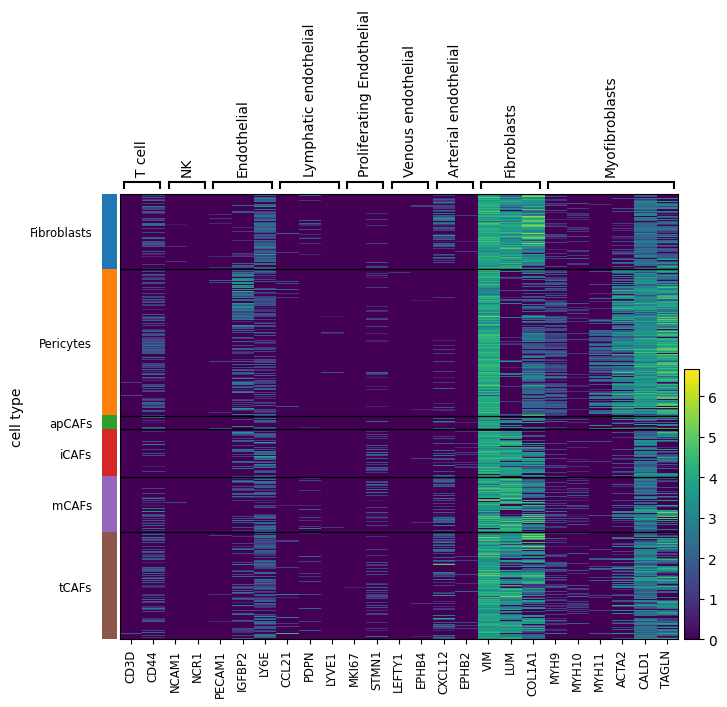

In [79]:
sc.pl.heatmap(fdata4,cellmarker_dict, groupby='cell type')

In [80]:
#clusters defined by this paper https://www.nature.com/articles/s41467-023-39762-1 

fibroblast_dict={'mCAF':['MMP11','POSTN','COL1A1','COMP','COL10A1','COL11A1'],
'iCAF':['CFD','PLA2G2A','APOD','PI16','CXCL14','PRG4'], 
'vCAF':['MYH11','RERGL','ADIRF','ACTA2','BCAM','MCAM'],
'Pericyte':['MCAM','RGS5','NDUFA4L2','COL4A1','HIGD1B','COX4I2','COL4A2'],
'tCAF':['ENO1','BNIP3','GAPDH','PGK1','NDRG1','TMEM158'],
'hsp tCAF':['HSPH1','VEGFA','CCNL1','VMP1','SAT1'],
'ifnCAF':['CCL5','CXCL11','CXCL10','CXCL9','CCL19','CST1'],
'apCAF':['CXCR4','HLA-DRB1','HLA-DRA','CD74','IGLC2','IGKC'],
'rCAF':['CCL21','IGFBP5','CCL2','C2orf40','APOE'],
'dCAF':['STMN1','PTTG1','H2AFZ','CENPF','MKI67','TOP2A']    }

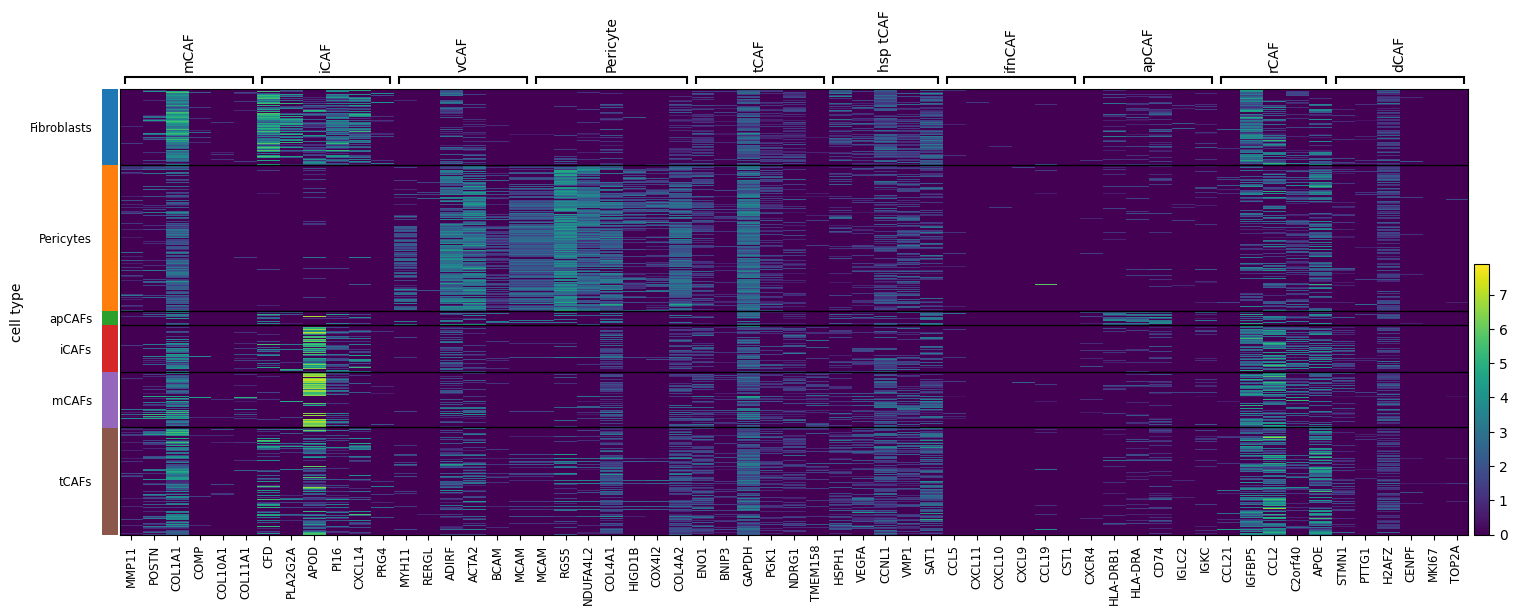

In [81]:
sc.pl.heatmap(fdata4,fibroblast_dict, groupby='cell type',show_gene_labels=bool)

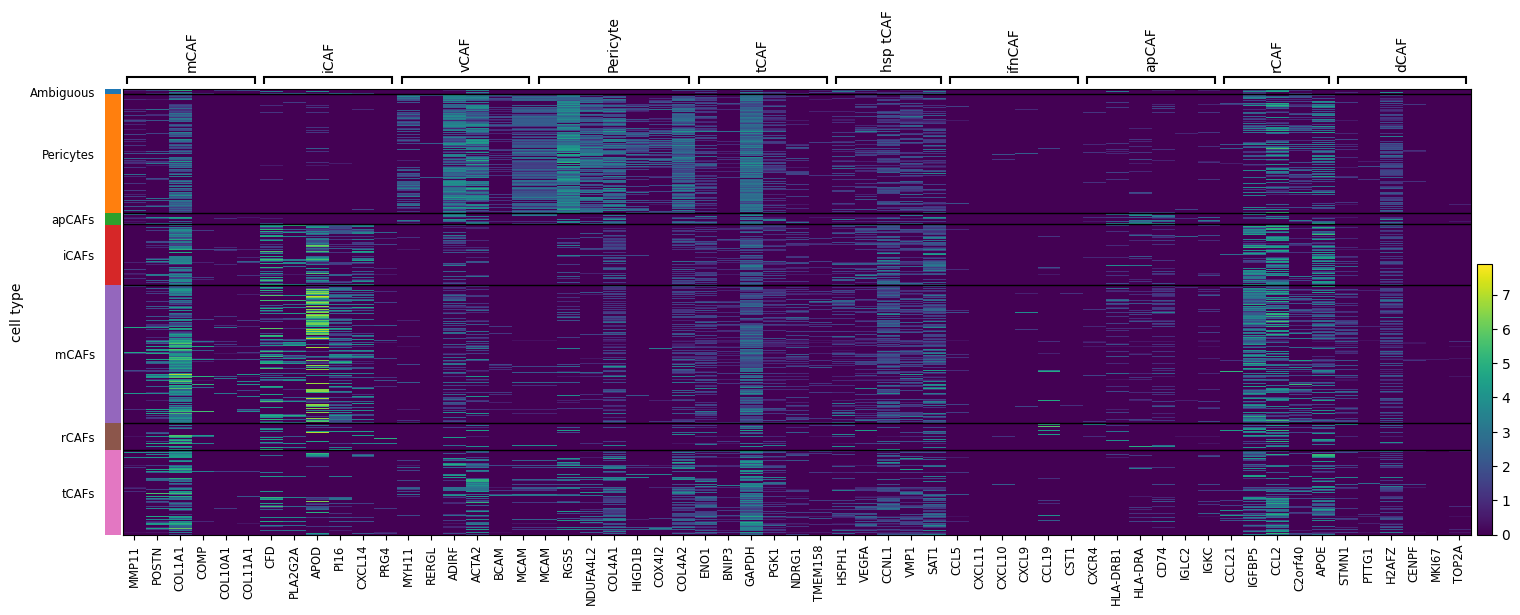

In [82]:
sc.pl.heatmap(fdata2,fibroblast_dict, groupby='cell type',show_gene_labels=bool)